In [1]:
import pandas as pd
import numpy as np

#directory = '/content/drive/My Drive/progetto stat learning/tabelle'
directory = 'C:\\Users\\Admin\\Documents\\University\\DataScience\\Statistical_data_analysis\\progetto_esame_modB\\SerieA\\spi_tables_csv'
file = 'PCAdf.csv'
df = pd.read_csv(f'{directory}/{file}')

print(df.shape)
df.head(5)

(60, 15)


,Unnamed: 0,Capacità Finalizzazione,Capacità Realizzazione,Tiro da palla inattiva,Recupero palla nella propria metà campo,Atteggiamento difensivo (catenaccio),Contrasto dei dribbling / marcatura a zona,Aggressività/gioco duro,Gioco remissivo,Difesa scoordinata (errori tecnici/eccessiva foga),Passaggi propositivi media gittata (precisione nei passaggi e pochi tocchi in area),Palla contesa a media altezza (gioco medio-alto / palla non giocata a terra),Controllo palla nella metà campo avversaria,Efficacia del possesso,SPI
0,2017/18 Atalanta,3.770892,-1.439785,-0.543069,-6.313763,2.413454,2.131328,0.925259,1.147625,0.306478,-5.315977,1.219798,4.636669,2.650551,77.84
1,2017/18 Benevento,-4.137231,-1.844861,-0.609378,0.755111,-2.070459,2.440607,0.489958,1.035762,-2.211465,-3.834434,-1.992803,0.192111,4.480517,46.68
2,2017/18 Bologna,-4.734060,2.646283,0.043911,-4.108456,-2.081832,-0.495282,0.074680,-1.482271,-0.138611,-4.271176,-1.086042,-1.184231,2.627645,53.93
3,2017/18 Cagliari,-5.557184,0.363297,-0.855960,-1.955227,-0.609803,2.197008,-0.591940,0.294250,-1.663515,-4.124196,-1.403183,-3.659281,-1.508138,50.78
4,2017/18 Chievo,-5.303552,1.355168,-3.271627,-1.996731,-1.719392,0.196646,2.130428,-1.244969,2.022410,-3.980627,-1.019936,-3.390984,-1.839263,52.54


In [2]:
#pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe(include='all')
tmp = df.describe(include='all')
tmp.to_csv('summary_teams_pca.csv')

In [2]:
shape = df.shape
season_squad = list(df.columns[0])
features = list(df.columns[1:(shape[1]-1)])

# Separating out the features
x = df.loc[:, features].values
#print(np.mean(x, axis=0))
#print(np.std(x, axis=0))

y = df.loc[:, 'SPI'].values

In [14]:
#CORRELAZIONE CON SPI
corr_df = df.iloc[:,1:].corr()
corr_df.iloc[:,-1]

Capacità Finalizzazione                                                                0.917430
Capacità Realizzazione                                                                -0.150266
Tiro da palla inattiva                                                                -0.024565
Recupero palla nella propria metà campo                                               -0.013971
Atteggiamento difensivo (catenaccio)                                                   0.810032
Contrasto dei dribbling / marcatura a zona                                            -0.186122
Aggressività/gioco duro                                                               -0.079657
Gioco remissivo                                                                        0.007696
Difesa scoordinata (errori tecnici/eccessiva foga)                                    -0.016518
Passaggi propositivi media gittata (precisione nei passaggi e pochi tocchi in area)   -0.040597
Palla contesa a media altezza (gioco med

In [16]:
import matplotlib.pyplot as plt

corr_df = df.iloc[:,1:]

#https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
corr = corr_df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)\
    .set_properties(**{'max-width': '10px', 'font-size': '10pt'})\
    .set_precision(2)

## calculating and plotting the correlation coeff's using a seaborn heatmap
#corr = corr_df.corr()
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')

#You can use pyplot.matshow() from matplotlib
#f = plt.figure(figsize=(10, 10))
#plt.matshow(corr_df.corr(), fignum=f.number)
#plt.xticks(range(corr_df.shape[1]), corr_df.columns, fontsize=8, rotation=90)
#plt.yticks(range(corr_df.shape[1]), corr_df.columns, fontsize=8)
#cb = plt.colorbar()
#cb.ax.tick_params(labelsize=14)
##plt.title('Correlation Matrix', fontsize=16)
#plt.show()

#
#from string import ascii_letters
#import seaborn as sns
#import matplotlib.pyplot as plt
#sns.set(style="white")
## Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
## Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))
## Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
## Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})

,Capacità Finalizzazione,Capacità Realizzazione,Tiro da palla inattiva,Recupero palla nella propria metà campo,Atteggiamento difensivo (catenaccio),Contrasto dei dribbling / marcatura a zona,Aggressività/gioco duro,Gioco remissivo,Difesa scoordinata (errori tecnici/eccessiva foga),Passaggi propositivi media gittata (precisione nei passaggi e pochi tocchi in area),Palla contesa a media altezza (gioco medio-alto / palla non giocata a terra),Controllo palla nella metà campo avversaria,Efficacia del possesso,SPI
Capacità Finalizzazione,1,-1.3e-11,2.5e-11,0.058,0.79,-0.15,0.063,-0.033,-0.14,0.063,0.84,0.84,-0.17,0.92
Capacità Realizzazione,-1.3e-11,1,6.9e-11,0.1,-0.17,0.054,0.39,-0.17,-0.071,0.12,-0.0049,-0.1,0.22,-0.15
Tiro da palla inattiva,2.5e-11,6.9e-11,1,0.36,-0.093,0.053,-0.23,0.097,-0.26,0.43,-0.12,-0.18,-0.059,-0.025
Recupero palla nella propria metà campo,0.058,0.1,0.36,1,7e-12,-7.8e-12,-1.9e-11,-3.5e-11,-1.7e-11,0.59,0.079,-0.073,-0.17,-0.014
Atteggiamento difensivo (catenaccio),0.79,-0.17,-0.093,7e-12,1,-3.4e-12,-2.5e-11,8.7e-12,2.1e-11,-0.14,0.87,0.87,-0.27,0.81
Contrasto dei dribbling / marcatura a zona,-0.15,0.054,0.053,-7.8e-12,-3.4e-12,1,3.8e-12,-2.8e-11,1.2e-11,-0.075,-0.26,-0.13,0.38,-0.19
Aggressività/gioco duro,0.063,0.39,-0.23,-1.9e-11,-2.5e-11,3.8e-12,1,6.2e-12,4.2e-12,0.036,0.074,-0.0082,0.047,-0.08
Gioco remissivo,-0.033,-0.17,0.097,-3.5e-11,8.7e-12,-2.8e-11,6.2e-12,1,-3.5e-11,0.15,-0.011,-0.13,-0.26,0.0077
Difesa scoordinata (errori tecnici/eccessiva foga),-0.14,-0.071,-0.26,-1.7e-11,2.1e-11,1.2e-11,4.2e-12,-3.5e-11,1,-0.35,-0.084,-0.052,-0.12,-0.017
Passaggi propositivi media gittata (precisione nei passaggi e pochi tocchi in area),0.063,0.12,0.43,0.59,-0.14,-0.075,0.036,0.15,-0.35,1,-1.7e-11,-0.25,-0.21,-0.041


In [12]:
#You can then use a package that converts html to an image. 
#For example, IMGKit: Python library of HTML to IMG wrapper. 
#Bear in mind that this solution requires the installation of wkhtmltopdf, 
#a command line tool to render HTML into PDF and various image formats. 
#It is all described in the IMGKit page.

#pip install imgkit
#https://wkhtmltopdf.org/downloads.html

import imgkit

corr = corr_df.corr()
html_string = corr.style.background_gradient(cmap='coolwarm', axis=None)\
                    .set_properties(**{'max-width': '10px', 'font-size': '8pt'})\
                    .set_precision(2)\
                    .render()

Html_file= open("corr_matr.html","w")
Html_file.write(html_string)
Html_file.close()

imgkit.from_string(html_string, 'corr_matr.png')

OSError: No wkhtmltoimage executable found: "b''"
If this file exists please check that this process can read it. Otherwise please install wkhtmltopdf - http://wkhtmltopdf.org


# LINEAR REGRESSION MODELS

In [7]:
#simple regression model
#using the most correlated feature: Capacità finalizzazione 0.92
from sklearn.linear_model import LinearRegression

xs = df.loc[:, 'Capacità Finalizzazione'].values
xs = xs.reshape(-1, 1)
ys = df.loc[:, 'SPI'].values
simple_reg = LinearRegression().fit(xs, ys)
# The coefficients
print('Coefficients: \n', simple_reg.coef_)
# The intercept
print('Intercept: \n', simple_reg.intercept_)
# The score
print('Score: \n', simple_reg.score(xs, ys))
#print(simple_reg.score(xs, ys), 1 - (1-simple_reg.score(xs, ys))*(len(ys)-1)/(len(ys)-xs.shape[1]-1))

Coefficients: 
 [2.47374139]
Intercept: 
 64.85450000012369
Score: 
 0.8416782208178843


<function matplotlib.pyplot.show(*args, **kw)>

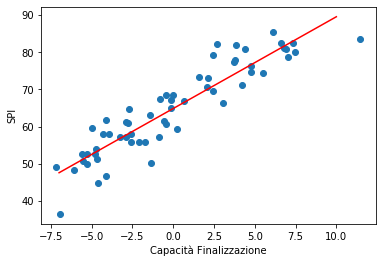

In [8]:
#plot
import matplotlib.pyplot as plt

plt.scatter(xs,ys)
plt.xlabel('Capacità Finalizzazione')
plt.ylabel('SPI')
lr_x = np.linspace(-7,10,100)
lr_y = 2.47*lr_x + 64.85
plt.plot(lr_x, lr_y, '-r', label='y=2.47x+64.85')

plt.show

In [9]:
#multiple regression model including all features
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x, y)
# The coefficients
print('Coefficients: \n', reg.coef_)
# The intercept
print('Intercept: \n', reg.intercept_)
# The score
print('Score: \n', reg.score(x, y))

Coefficients: 
 [ 2.047121   -0.22237369  0.09213171 -0.262204    0.81946655 -0.52141923
 -0.79176046  0.27735725  0.92541263  0.0774973  -1.19148043  0.71094035
 -0.39723195]
Intercept: 
 64.8545000001226
Score: 
 0.8991458991994087


In [10]:
# SST = SSR + SSE
#https://stackoverflow.com/questions/42033720/python-sklearn-multiple-linear-regression-display-r-squared

model = LinearRegression()
model.fit(x,y)

# compute with formulas from the theory
yhat = model.predict(x)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1)
print(f"R^2: {r_squared:.3f},\nR^2_adj: {adjusted_r_squared:.3f}")

# compute with sklearn linear_model, although could not find any function to compute adjusted-r-square directly from documentation
#print(model.score(x, y), 1 - (1-model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1))

R^2: 0.899,
R^2_adj: 0.871


In [11]:
#https://stackoverflow.com/questions/44495667/calculate-p-value-in-sklearn-using-python
#pip install regressors
from regressors import stats

#stats.adj_r2_score(reg, x, y)

# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(reg, x, y))
# to print summary table:
print("\n=========== SUMMARY ===========")
xlabels = features
stats.summary(reg, x, y, xlabels)

coef_pval:
 [0.00000000e+00 2.92654789e-13 4.98432850e-01 7.92342217e-01
 2.34932403e-01 1.18583600e-01 2.01523235e-01 4.19072103e-02
 4.93075095e-01 4.65828769e-02 4.58671703e-01 3.40292868e-01
 2.51109310e-01 3.69541532e-01]

=========== SUMMARY ===========
Residuals:
    Min      1Q  Median      3Q   Max
-7.9182 -2.5793 -0.6083  2.6794  7.44


Coefficients:
                                                     Estimate  Std. Error   t value   p value
_intercept                                          64.854500    0.487490  133.0377  0.000000
Capacità Finalizzazione                              2.047121    0.218797    9.3562  0.000000
Capacità Realizzazione                              -0.222374    0.326461   -0.6812  0.498433
Tiro da palla inattiva                               0.092132    0.348368    0.2645  0.792342
Recupero palla nella propria metà campo             -0.262204    0.218502   -1.2000  0.234932
Atteggiamento difensivo (catenaccio)                 0.819467    0.517403

### LASSO

In [12]:
from sklearn.linear_model import Lasso

reg_lasso = Lasso(alpha=0.1)
reg_lasso.fit(x,y)

# The coefficients
print('Coefficients: \n', reg_lasso.coef_)
# The intercept
print('Intercept: \n', reg_lasso.intercept_)
#R^2
print(f"R^2: {reg_lasso.score(x, y):.3f},\nR^2_adj: {1 - (1-reg_lasso.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1):.3f}")

Coefficients: 
 [ 2.13834457 -0.39940056  0.06355229 -0.22110082  0.67382224 -0.38592811
 -0.81122728  0.15319874  0.84021444 -0.0035431  -0.          0.09883997
 -0.10288161]
Intercept: 
 64.8545000001832
R^2: 0.898,
R^2_adj: 0.869


In [13]:
from regressors import stats

# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(reg_lasso, x, y))
# to print summary table:
print("\n=========== SUMMARY ===========")
xlabels = features
stats.summary(reg_lasso, x, y, xlabels)

coef_pval:
 [0.00000000e+00 7.90478794e-14 2.29425607e-01 8.56920690e-01
 3.19264222e-01 2.01143044e-01 3.46510689e-01 3.86498220e-02
 7.06666100e-01 7.19929910e-02 9.73109289e-01 1.00000000e+00
 8.73465057e-01 8.16974839e-01]

=========== SUMMARY ===========
Residuals:
    Min      1Q  Median     3Q     Max
-8.1916 -2.7421 -0.5346  2.442  8.4112


Coefficients:
                                                     Estimate  Std. Error   t value   p value
_intercept                                          64.854500    0.491104  132.0587  0.000000
Capacità Finalizzazione                              2.138345    0.220419    9.7013  0.000000
Capacità Realizzazione                              -0.399401    0.328882   -1.2144  0.229426
Tiro da palla inattiva                               0.063552    0.350951    0.1811  0.856921
Recupero palla nella propria metà campo             -0.221101    0.220122   -1.0044  0.319264
Atteggiamento difensivo (catenaccio)                 0.673822    0.5212

In [14]:
from sklearn.linear_model import LassoCV

values = 10**np.linspace(1,-2,100)*0.5

reg_lasso_CV = LassoCV(cv=5, alphas=values).fit(x, y)
reg_lasso_CV.score(x, y)

0.8746239080094486

In [15]:
reg_lasso_CV.alphas_

array([5.        , 4.66301673, 4.34874501, 4.05565415, 3.78231664,
       3.52740116, 3.28966612, 3.06795364, 2.86118383, 2.66834962,
       2.48851178, 2.32079442, 2.16438064, 2.01850863, 1.8824679 ,
       1.75559587, 1.63727458, 1.52692775, 1.42401793, 1.32804389,
       1.23853818, 1.15506485, 1.07721735, 1.0046165 , 0.93690871,
       0.8737642 , 0.81487542, 0.75995554, 0.70873708, 0.66097057,
       0.61642337, 0.5748785 , 0.53613361, 0.5       , 0.46630167,
       0.4348745 , 0.40556542, 0.37823166, 0.35274012, 0.32896661,
       0.30679536, 0.28611838, 0.26683496, 0.24885118, 0.23207944,
       0.21643806, 0.20185086, 0.18824679, 0.17555959, 0.16372746,
       0.15269278, 0.14240179, 0.13280439, 0.12385382, 0.11550649,
       0.10772173, 0.10046165, 0.09369087, 0.08737642, 0.08148754,
       0.07599555, 0.07087371, 0.06609706, 0.06164234, 0.05748785,
       0.05361336, 0.05      , 0.04663017, 0.04348745, 0.04055654,
       0.03782317, 0.03527401, 0.03289666, 0.03067954, 0.02861

In [16]:
reg_lasso_CV.alpha_

1.424017934217901

In [17]:
test_mse = np.mean(reg_lasso_CV.mse_path_, axis=1)

In [18]:
min_alpha = reg_lasso_CV.alpha_
min_test_mse = np.min(test_mse)

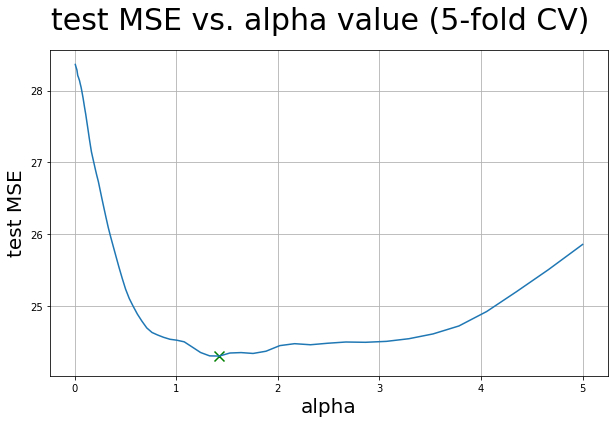

In [19]:
# Plotting
fig = plt.figure(figsize=(10,6))
fig.suptitle('test MSE vs. alpha value (5-fold CV)', fontsize=30)
#plt.title()
plt.xlabel('alpha', fontsize=20)
plt.ylabel('test MSE', fontsize=20)
#plt.hlines(y=0.815,xmin=0,xmax=5.0,colors='red',linestyles='dashed')
plt.plot(reg_lasso_CV.alphas_, test_mse)
plt.grid(True)
plt.scatter(min_alpha, min_test_mse, s=100, c='green', marker='x')
#plt.scatter(alpha_val, score_val)

In [20]:
#https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

#values = np.linspace(0,5,500)
values = 10**np.linspace(1,-2,100)*0.5
results = []
for alpha in values:
    #print(f'Alpha: {alpha}')
    reg_lasso = Lasso(alpha=alpha)
    scores = cross_val_score(reg_lasso, x, y, cv=5)
    score = np.sum(scores)/scores.shape
    results.append((alpha,score))
#print(results)

In [21]:
sorted_by_score = sorted(results, key=lambda tup: tup[1])
max_score = sorted_by_score[-1][1]
max_alpha = sorted_by_score[-1][0]
print(sorted_by_score[-1])

(1.424017934217901, array([0.81830746]))


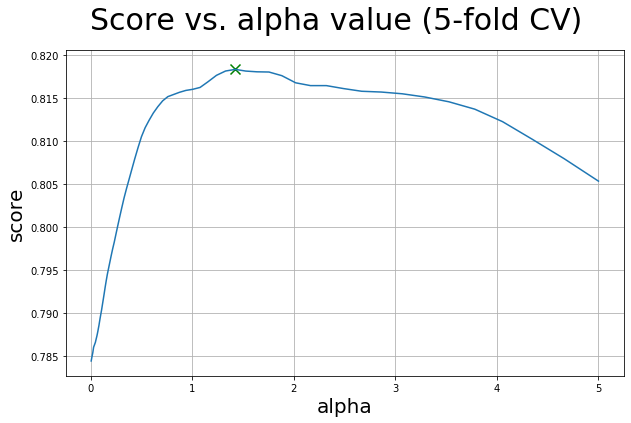

In [22]:
alpha_val = [couple[0] for couple in results]
score_val = [couple[1] for couple in results]

# Plotting
fig = plt.figure(figsize=(10,6))
fig.suptitle('Score vs. alpha value (5-fold CV)', fontsize=30)
#plt.title()
plt.xlabel('alpha', fontsize=20)
plt.ylabel('score', fontsize=20)
#plt.hlines(y=0.815,xmin=0,xmax=5.0,colors='red',linestyles='dashed')
plt.plot(alpha_val, score_val)
plt.grid(True)
plt.scatter(max_alpha, max_score, s=100, c='green', marker='x')
#plt.scatter(alpha_val, score_val)

In [26]:
from sklearn.linear_model import Lasso

reg_lasso = Lasso(alpha=1.42)
reg_lasso.fit(x,y)

# The coefficients
print('Coefficients: \n', reg_lasso.coef_)
# The intercept
print('Intercept: \n', reg_lasso.intercept_)
#R^2
print(f"R^2: {reg_lasso.score(x, y):.3f},\nR^2_adj: {1 - (1-reg_lasso.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1):.3f}")

from regressors import stats

# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(reg_lasso, x, y))
# to print summary table:
print("\n=========== SUMMARY ===========")
xlabels = features
stats.summary(reg_lasso, x, y, xlabels)

Coefficients: 
 [ 2.15799039 -0.32938678  0.         -0.          0.39969048 -0.
 -0.21162461  0.          0.         -0.08613624  0.          0.11308744
 -0.0245251 ]
Intercept: 
 64.85450000009766
R^2: 0.875,
R^2_adj: 0.839
coef_pval:
 [0.00000000e+00 2.04369854e-12 3.69042738e-01 1.00000000e+00
 1.00000000e+00 4.90998131e-01 1.00000000e+00 6.19843088e-01
 1.00000000e+00 1.00000000e+00 4.59939326e-01 1.00000000e+00
 8.69190677e-01 9.60222433e-01]

=========== SUMMARY ===========
Residuals:
    Min      1Q  Median      3Q     Max
-8.7678 -2.7146 -0.3193  2.0716  12.152


Coefficients:
                                                     Estimate  Std. Error   t value   p value
_intercept                                          64.854500    0.543371  119.3558  0.000000
Capacità Finalizzazione                              2.157990    0.243878    8.8486  0.000000
Capacità Realizzazione                              -0.329387    0.363884   -0.9052  0.369043
Tiro da palla inattiva         

### RIDGE

In [27]:
from sklearn.linear_model import Ridge

reg_ridge = Ridge(alpha=0.1)
reg_ridge.fit(x,y)

# The coefficients
print('Coefficients: \n', reg_ridge.coef_)
# The intercept
print('Intercept: \n', reg_ridge.intercept_)
#R^2
print(f"R^2: {reg_ridge.score(x, y):.3f},\nR^2_adj: {1 - (1-reg_ridge.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1):.3f}")

Coefficients: 
 [ 2.04793469 -0.22555682  0.09278777 -0.26186034  0.81645002 -0.51914997
 -0.79172368  0.27587104  0.92426766  0.07617123 -1.1709218   0.7016618
 -0.39282347]
Intercept: 
 64.85450000012376
R^2: 0.899,
R^2_adj: 0.871


In [28]:
# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(reg_ridge, x, y))
# to print summary table:
print("\n=========== SUMMARY ===========")
xlabels = features
stats.summary(reg_ridge, x, y, xlabels)

coef_pval:
 [0.00000000e+00 2.88435942e-13 4.92329917e-01 7.90898985e-01
 2.35540093e-01 1.19918643e-01 2.03465920e-01 4.19168096e-02
 4.95386669e-01 4.68461840e-02 4.66361399e-01 3.48627515e-01
 2.57280391e-01 3.74842549e-01]

=========== SUMMARY ===========
Residuals:
    Min      1Q  Median      3Q    Max
-7.9198 -2.5793 -0.6076  2.6773  7.457


Coefficients:
                                                     Estimate  Std. Error   t value   p value
_intercept                                          64.854500    0.487491  133.0374  0.000000
Capacità Finalizzazione                              2.047935    0.218798    9.3599  0.000000
Capacità Realizzazione                              -0.225557    0.326462   -0.6909  0.492330
Tiro da palla inattiva                               0.092788    0.348369    0.2663  0.790899
Recupero palla nella propria metà campo             -0.261860    0.218502   -1.1984  0.235540
Atteggiamento difensivo (catenaccio)                 0.816450    0.5174

In [35]:
from sklearn.linear_model import RidgeCV

alphas=np.arange(0.1,500.0)

reg_ridge_CV = RidgeCV(alphas=alphas,cv=5).fit(x, y)
reg_ridge_CV.score(x, y)

0.8850815679380781

In [36]:
reg_ridge_CV.alpha_

106.1

(106.1, array([0.83141793]))


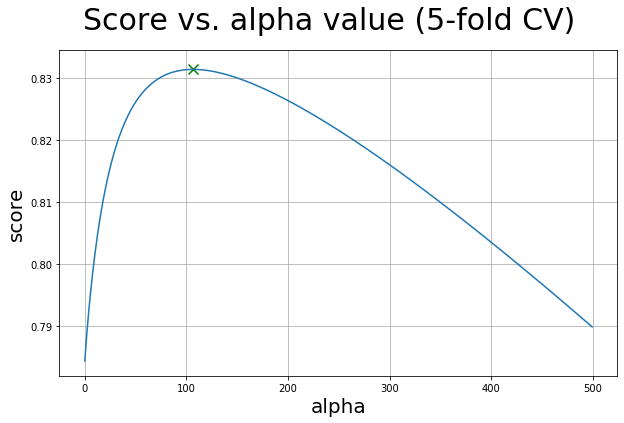

In [37]:
values = np.arange(0.1,500.0)
results = []
for alpha in values:
    #print(f'Alpha: {alpha}')
    reg_ridge = Ridge(alpha=alpha)
    scores = cross_val_score(reg_ridge, x, y, cv=5)
    score = np.sum(scores)/scores.shape
    results.append((alpha,score))
#print(results)
sorted_by_score = sorted(results, key=lambda tup: tup[1])
max_score = sorted_by_score[-1][1]
max_alpha = sorted_by_score[-1][0]
print(sorted_by_score[-1])

alpha_val = [couple[0] for couple in results]
score_val = [couple[1] for couple in results]

# Plotting
fig = plt.figure(figsize=(10,6))
fig.suptitle('Score vs. alpha value (5-fold CV)', fontsize=30)
#plt.title()
plt.xlabel('alpha', fontsize=20)
plt.ylabel('score', fontsize=20)
#plt.hlines(y=0.815,xmin=0,xmax=5.0,colors='red',linestyles='dashed')
plt.plot(alpha_val, score_val)
plt.grid(True)
plt.scatter(max_alpha, max_score, s=100, c='green', marker='x')
#plt.scatter(alpha_val, score_val)

In [34]:
from sklearn.linear_model import Ridge

reg_ridge = Ridge(alpha=106)
reg_ridge.fit(x,y)

# The coefficients
print('Coefficients: \n', reg_ridge.coef_)
# The intercept
print('Intercept: \n', reg_ridge.intercept_)
#R^2
print(f"R^2: {reg_ridge.score(x, y):.3f},\nR^2_adj: {1 - (1-reg_ridge.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1):.3f}")

# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(reg_ridge, x, y))
# to print summary table:
print("\n=========== SUMMARY ===========")
xlabels = features
stats.summary(reg_ridge, x, y, xlabels)

Coefficients: 
 [ 1.65089755 -0.321265    0.12161443 -0.16845381  0.51557326 -0.2049312
 -0.42041256  0.12992333  0.35615658  0.00670094  0.16112061  0.57644023
 -0.29459827]
Intercept: 
 64.85450000012563
R^2: 0.885,
R^2_adj: 0.853
coef_pval:
 [0.00000000e+00 2.06761563e-09 3.60307431e-01 7.44781857e-01
 4.72977493e-01 3.54339128e-01 6.36120047e-01 3.05091517e-01
 7.63191115e-01 4.66492309e-01 9.52020500e-01 9.03475218e-01
 3.82195936e-01 5.32247061e-01]

=========== SUMMARY ===========
Residuals:
    Min      1Q  Median      3Q      Max
-8.1331 -2.8128 -0.4165  2.4513  11.2692


Coefficients:
                                                     Estimate  Std. Error   t value   p value
_intercept                                          64.854500    0.520341  124.6386  0.000000
Capacità Finalizzazione                              1.650898    0.233542    7.0690  0.000000
Capacità Realizzazione                              -0.321265    0.348461   -0.9220  0.360307
Tiro da palla inattiva